# MSBD5010 Assignment 1

# Overview
In the assignment, you need to complete 4 image processing tasks. Please read instructions and comments of the skeleton carefully before writing your own codes.

For each function, the code skeleton is provided and your task is to **fill in the missing block** within. Any modifications outside of this area will result in 0 score penalty.
```
######### start of your code #########

######### end of your code #########
```


### **Please note that**

*   **DO NOT** edit the code outside the answering area.
*   you are **NOT** allowed to use libraries or any pre-defined image processing/computer vision functions other than those provided in the preparation module.
*   Any violations will result in 0 score penalty of the corresponding function.



# Preparation

1. Upload test images (lena.png, task4.png, ...) to to the Files 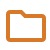 (the bottom option in the left menu bar) if you are using Colab.

2. Run the following code to import the libraries that you are allowed to use.

The helper function `read_img` is provided to read a gray image file and convert it to a `numpy.array` object of size [x, y].

The helper function `read_rgb` is provided to read a RGB image file and convert it to a `numpy.array` object of size [x, y, 3] (used only in task 1).

**DO NOT EDIT** this code cell.

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def read_img(img_path):
    gray_img = Image.open(img_path).convert('L')
    img_data = np.asarray(gray_img)
    return img_data

def read_rgb(img_path):
    img = Image.open(img_path).convert('RGB')
    img_data = np.asarray(img)
    return img_data

# Task 1 Gamma Correction
Complete the function `gamma_correction` to apply power-law (gamma) transformation to the input image with the given parameter gamma.

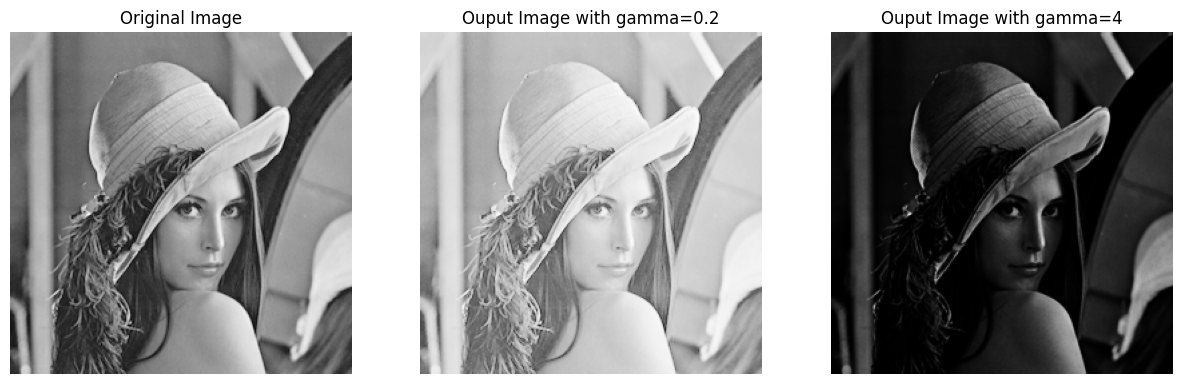

In [12]:
def gamma_correction(image, gamma):
      # Ensure input is a float array to avoid rounding issues.
      image = image.astype(np.float32)

      ######### start of your code #########

      image = np.power(image, gamma)
      image = image / np.max(image) * 255

      ######### end of your code #########
      return image

img = read_img('lena.png')
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

output1 = gamma_correction(img, 0.2)
plt.subplot(1, 3, 2)
plt.imshow(output1, cmap='gray')
plt.title('Ouput Image with gamma=0.2')
plt.axis('off')

output2 = gamma_correction(img, 4)
plt.subplot(1, 3, 3)
plt.imshow(output2, cmap='gray')
plt.title('Ouput Image with gamma=4')
plt.axis('off')
plt.show()

# Task 2 Edge Detection
Complete the function `sobeledge` to find edges automatically.

The algorithm is as follows:
1. Obtain the **gradient image** by detecting edges of the input image using sobel.
2. Initialize a variable `t` as the mean between the maximum and minimum values of the **gradient image**.
3. Threshold the gradient map using `t`, which produces two sub-regions `G1` (consisting of pixels with values >= `t`) and `G2` (consisting of pixels with values < `t`).
4. Compute the average intensity values `m1` and `m2` for regions `G1` and `G2`.
5. Update the threshold value `t = 0.5 * (m1 + m2)`.
6. Repeat *step 3 - 5* ten times or until the change of `t` in successive iterations is smaller than 5%.
7. Return the **gradient image**, and the binary **edge image** (with `G1` assigned value 0 and `G2` assigned 255).

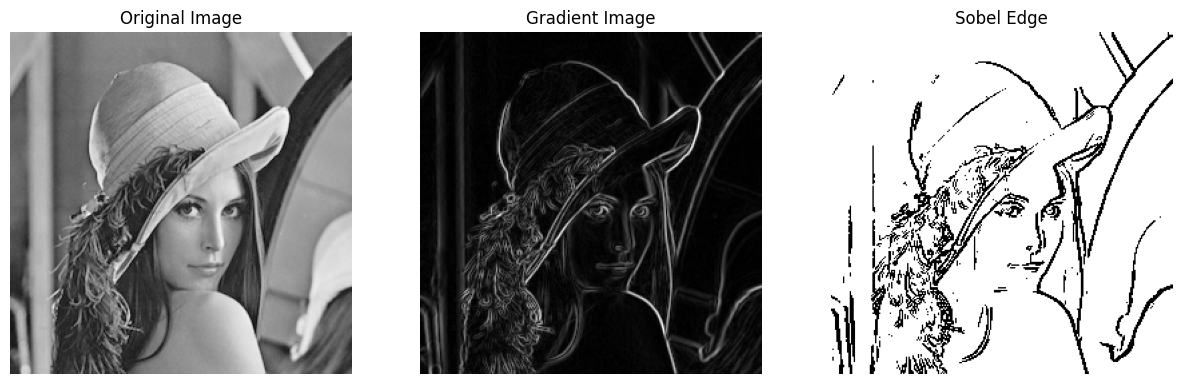

In [13]:
def sobeledge(image):
    # The output gradient image
    gradient_magnitude = np.zeros_like(image)

    # The output binary edge image (containing only 0 or 255)
    edge = np.zeros_like(image)

    # Ensure input is a float array to avoid rounding issues
    image = image.astype(np.float32)

    ######### start of your code #########

    def conv2d(image, kernel):
        image_h, image_w = image.shape
        kernel_h, kernel_w = kernel.shape

        pad_h = kernel_h // 2
        pad_w = kernel_w // 2

        padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='edge')
        output = np.zeros_like(image)

        for i in range(image_h):
            for j in range(image_w):
                output[i, j] = np.sum(padded_image[i:i+kernel_h, j:j+kernel_w] * kernel)

        return output

    sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    sobel_x = conv2d(image, sobel_x_kernel)
    sobel_y = conv2d(image, sobel_y_kernel)

    gradient_magnitude = np.sqrt(np.square(sobel_x) + np.square(sobel_y))

    t = 0.5 * (np.max(gradient_magnitude) + np.min(gradient_magnitude))
    for _ in range(10):
        G1 = gradient_magnitude >= t
        G2 = gradient_magnitude < t

        m1 = np.mean(gradient_magnitude[G1]) if np.any(G1) else 0
        m2 = np.mean(gradient_magnitude[G2]) if np.any(G2) else 0

        t = 0.5 * (m1 + m2)

    edge[gradient_magnitude >= t] = 0
    edge[gradient_magnitude < t] = 255

    ######### end of your code #########

    return gradient_magnitude, edge

img = read_img('lena.png')
gradient, edge = sobeledge(img)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gradient, cmap='gray')
plt.title('Gradient Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edge, cmap='gray')
plt.title('Sobel Edge')
plt.axis('off')
plt.show()

# Task 3 Unsharp Masking and Highboost filtering
Complete the function `highboost`.

The parameter `image` of type `numpy.array` is the gray image to be processed, `kernel_size` is the kernel size of the filter, `sigma` is the standard deviation of the Gaussian blurring, `k` is the coefficient adding the mask to the original image.

Return `blurred_image` as the Gaussian filtered image and `filtered_image` as the bilateral filtered output.

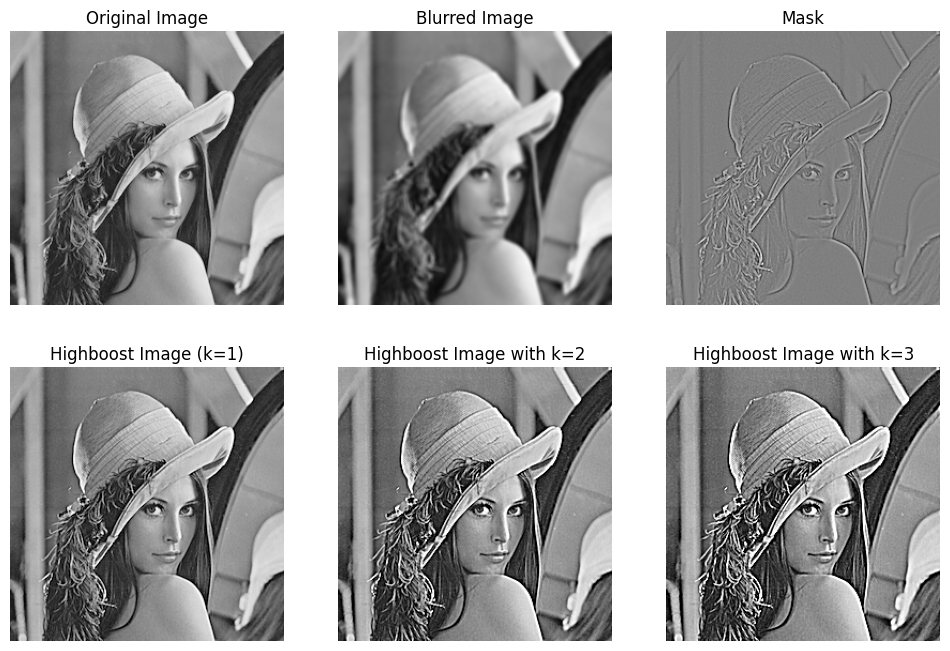

In [17]:
def highboost(image, kernel_size=5, sigma=4, k=1):
    # The output highboost filtered image
    sharpened_image = np.zeros_like(image)

    # The output Gaussian Blurred image
    blurred_image = np.zeros_like(image)

    # Ensure input is a float array to avoid rounding issues.
    image = image.astype(np.float32)

    ######### start of your code #########

    def gaussian(sigma, r):
        return np.exp(-r**2 / (2 * sigma**2)) / (2 * np.pi * sigma**2)

    half_size = kernel_size // 2
    y, x = np.ogrid[-half_size:half_size+1, -half_size:half_size+1]
    distance = np.sqrt(x**2 + y**2)
    kernel = gaussian(sigma, distance)
    wp = np.sum(kernel)

    def conv2d(image, kernel):
        image_h, image_w = image.shape
        pad_h = pad_w = half_size
        padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')
        
        output = np.zeros_like(image)
        for i in range(image_h):
            for j in range(image_w):
                output[i, j] = np.sum(padded_image[i:i+kernel_size, j:j+kernel_size] * kernel) / wp
        
        return output

    blurred_image = conv2d(image, kernel)
    sharpened_image = image + k * (image - blurred_image)
    sharpened_image = np.clip(sharpened_image, 0, 255)

    ######### end of your code #########

    return blurred_image, sharpened_image


img_data = read_img('lena.png')
blurred_image, filtered_image = highboost(img_data, sigma=2)
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img_data, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_data - blurred_image, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(filtered_image, cmap='gray')
plt.title('Highboost Image (k=1)')
plt.axis('off')

blurred_image, filtered_image = highboost(img_data, k=2)
plt.subplot(2, 3, 5)
plt.imshow(filtered_image, cmap='gray')
plt.title('Highboost Image with k=2')
plt.axis('off')

blurred_image, filtered_image = highboost(img_data, k=3)
plt.subplot(2, 3, 6)
plt.imshow(filtered_image, cmap='gray')
plt.title('Highboost Image with k=3')
plt.axis('off')

plt.show()

# Task 4 Frequency Domain Filtering
Complete the function `gaussian_lowpass_filtering` to apply the Gaussian lowpass filter (GLPF) in the frequency domain.

You are allowed to use fft functions of numpy, but no direct implementation of GLPF.

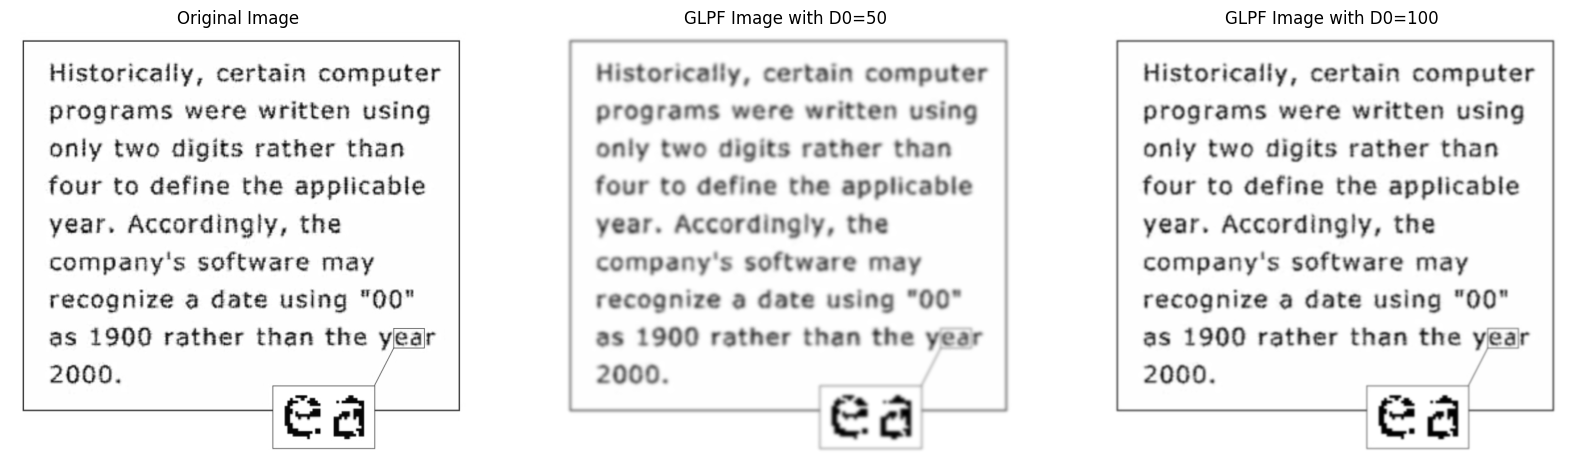

In [15]:
def gaussian_lowpass_filtering(image, D_0=50):
    # The output filtered image
    filtered_image = image

    # FFT: Transform the image to the frequency domain
    freq_domain = np.fft.fft2(image)

    ######### start of your code #########

    freq_domain_shifted = np.fft.fftshift(freq_domain)
    
    M, N = freq_domain_shifted.shape
    
    u = np.arange(N)
    v = np.arange(M)
    U, V = np.meshgrid(u, v)
    
    D_uv = np.sqrt((U - N/2)**2 + (V - M/2)**2)
    
    H = np.exp(-(D_uv**2) / (2 * (D_0**2)))
    
    # Apply the filter
    G = H * freq_domain_shifted
    
    # Inverse shift
    filtered_image = np.fft.ifftshift(G)

    ######### end of your code #########

    # IFFT: Transform back to the spatial domain
    filtered_image = np.fft.ifft2(filtered_image)

    # Take the real part as the filtered_image
    filtered_image = np.real(filtered_image)

    return filtered_image

img_data = read_img('task4.png')

filter_image_1 = gaussian_lowpass_filtering(img_data, D_0=50)
filter_image_2 = gaussian_lowpass_filtering(img_data, D_0=100)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(img_data, 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filter_image_1, 'gray')
plt.title('GLPF Image with D0=50')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filter_image_2, 'gray')
plt.title('GLPF Image with D0=100')
plt.axis('off')

plt.show()
